In [1]:
#SETUP

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, mean_squared_error, root_mean_squared_error
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split #at this point I ought to have just done import sklearn


In [2]:
#Read in the data

pogo_player_stats_day1 = pd.read_csv("/Users/katiebarnhart/Documents/Pogo_data/March_18.csv") #reads it into a dataframe
pogo_player_stats_day2 = pd.read_csv("/Users/katiebarnhart/Documents/Pogo_data/March_25.csv")
pogo_player_stats_day3 = pd.read_csv("/Users/katiebarnhart/Documents/Pogo_data/April_6.csv")
pogo_player_stats_day4 = pd.read_csv("/Users/katiebarnhart/Documents/Pogo_data/April_20.csv") # not ideal but we can work with that

print(pogo_player_stats_day1.head(1)) #lemme see the first row of data 
#the four sets of data should all have the same shape: 312 players and 7 attributes per player
#lets test it
print("day one has the shape: ", pogo_player_stats_day1.shape)
print("day two has the shape: ", pogo_player_stats_day2.shape)
print("day three has the shape: ", pogo_player_stats_day3.shape)
print("day four has the shape: ", pogo_player_stats_day4.shape)

#convert this to a format we've worked with in class
usernames = np.array(pogo_player_stats_day1["Username"])
#the lazy way; wow I'm not familiar with dataframes. 

day1_level = np.array(pogo_player_stats_day1["Level"])
day1_wins = np.array(pogo_player_stats_day1["Battles Won"])
day1_distance = np.array(pogo_player_stats_day1["Distance Walked"])
day1_catch = np.array(pogo_player_stats_day1["Pokemon Caught"])
day1_team = np.array(pogo_player_stats_day1["Team"])

day2_level = np.array(pogo_player_stats_day2["Level"])
day2_wins = np.array(pogo_player_stats_day2["Battles Won"])
day2_distance = np.array(pogo_player_stats_day2["Distance Walked"])
day2_catch = np.array(pogo_player_stats_day2["Pokemon Caught"])
day2_team = np.array(pogo_player_stats_day2["Team"])

day3_level = np.array(pogo_player_stats_day3["Level"])
day3_wins = np.array(pogo_player_stats_day3["Battles Won"])
day3_distance = np.array(pogo_player_stats_day3["Distance Walked"])
day3_catch = np.array(pogo_player_stats_day3["Pokemon Caught"])
day3_team = np.array(pogo_player_stats_day3["Team"])

day4_level = np.array(pogo_player_stats_day4["Level"])
day4_wins = np.array(pogo_player_stats_day4["Battles Won"])
day4_distance = np.array(pogo_player_stats_day4["Distance Walked"])
day4_catch = np.array(pogo_player_stats_day4["Pokemon Caught"])
day4_team = np.array(pogo_player_stats_day4["Team"])

  Username  Level  Battles Won  Distance Walked  Pokemon Caught   Team notes
0   007bda     46         5699          19592.2          155116  Valor   NaN
day one has the shape:  (312, 7)
day two has the shape:  (312, 7)
day three has the shape:  (312, 7)
day four has the shape:  (312, 7)


In [3]:
#Define consistent delta t's in terms of days. 
#call day 1 t = 0. Then day 2 is t = 7, day 3 is t = 19, and day 4 is t = 34
x = np.array([0, 7, 19, 34])

Text(0.5, 1.0, 'Predicted catch count over two months')

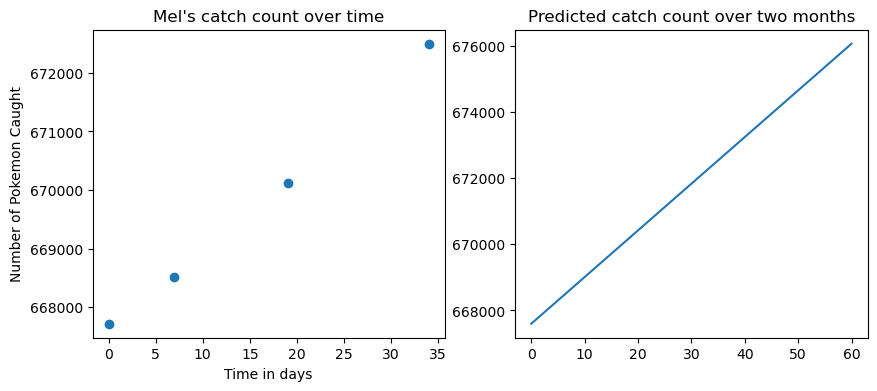

In [4]:
#Test plots? Test plots!

index_Mel = np.where(usernames == "HERR0kitteh")
#print(index_Mel, type(index_Mel)) #why is this a heckin tuple. Whatever. 
index_Melanie = 103

test_catch_Mel = np.array([day1_catch[index_Melanie], day2_catch[index_Melanie], day3_catch[index_Melanie], day4_catch[index_Melanie]])
#print(test_catch_Mel)

#lets just fit a line to this really quick
#the other nice thing I just realized was that I'm working with data that essentially have no uncertainties. 

x_reshaped = x.reshape(-1, 1) #forgot I had to do this and was so confused for a second. 
Mel_linear_model = LinearRegression()
Mel_linear_model.fit(X=x_reshaped, y=test_catch_Mel)
y_intercept_Mel = Mel_linear_model.intercept_
slope_Mel = Mel_linear_model.coef_
x_test = np.array([[0], [60]]) #two month interval
Mel_catch_pred = Mel_linear_model.predict(x_test) #predict the catch count over a two month interval

fig = plt.figure(figsize = (10, 4))
ax = fig.add_subplot(121)
ax.scatter(x, test_catch_Mel)
ax.set_title("Mel's catch count over time")
ax.set_xlabel("Time in days")
ax.set_ylabel("Number of Pokemon Caught")

ax = fig.add_subplot(122)
ax.plot(x_test, Mel_catch_pred)
ax.set_title("Predicted catch count over two months")

In [5]:
print("Mel's avg catch per day is: ", slope_Mel)
print("Mel's predicted catch count after 2 months is: ", int(Mel_catch_pred[1]))

Mel's avg catch per day is:  [141.06006006]
Mel's predicted catch count after 2 months is:  676061


In [6]:
#alright I should probably do something other than toy models. 
#currently I do want to fit every player for all three stats, so organizing the data for that is gonna be a bit of an adventure

#Start with data organization

grouped_catch_data = []
for i in range(312):
    grouped_catch_data.append(day1_catch[i])
    grouped_catch_data.append(day2_catch[i])
    grouped_catch_data.append(day3_catch[i])
    grouped_catch_data.append(day4_catch[i])

grouped_catch_data_array = np.array(grouped_catch_data)
#print(np.shape(grouped_catch_data_array))
regression_array_catch = np.reshape(grouped_catch_data_array, (312, 4))
#print(regression_array_catch)

grouped_battle_data = []
for i in range(312):
    grouped_battle_data.append(day1_wins[i])
    grouped_battle_data.append(day2_wins[i])
    grouped_battle_data.append(day3_wins[i])
    grouped_battle_data.append(day4_wins[i])

grouped_battle_data_array = np.array(grouped_battle_data)
regression_array_wins = np.reshape(grouped_battle_data_array, (312, 4))

grouped_distance_data = []
for i in range(312):
    grouped_distance_data.append(day1_distance[i])
    grouped_distance_data.append(day2_distance[i])
    grouped_distance_data.append(day3_distance[i])
    grouped_distance_data.append(day4_distance[i])

grouped_distance_data_array = np.array(grouped_distance_data)
regression_array_distance = np.reshape(grouped_distance_data_array, (312, 4))

#Move on to the regression

#compile the data (slopes) from the linear regressions into several arrays, one for each type of data. These should each have 312
#numbers in them; one for each player. 
catch_per_day = [] 
battle_per_day = []
distance_per_day = []
catch_predictions = []
battle_predictions = []
distance_predictions = []
x_test2 = np.array([[0], [52]]) 
#prediction day changed. Had to collect an entirely new set of final data. Where did the original final data file go?
#we may never know. 

#actually fit all the models and store the data
for j in range(312):
    catch_linear_model = LinearRegression()
    catch_linear_model.fit(X=x_reshaped, y=regression_array_catch[j])
    slope_catch = catch_linear_model.coef_
    #print(slope_catch)
    catch_per_day.append(slope_catch)
    catch_pred = catch_linear_model.predict(x_test2)
    catch_predictions.append(catch_pred[1])
    
    battle_linear_model = LinearRegression()
    battle_linear_model.fit(X=x_reshaped, y=regression_array_wins[j])
    slope_battle = battle_linear_model.coef_
    #print(slope_battle)
    battle_per_day.append(slope_battle)
    battle_pred = battle_linear_model.predict(x_test2)
    battle_predictions.append(battle_pred[1])
    
    distance_linear_model = LinearRegression()
    distance_linear_model.fit(X=x_reshaped, y=regression_array_distance[j])
    slope_distance = distance_linear_model.coef_
    #print(slope_distance)
    distance_per_day.append(slope_distance)
    distance_pred = distance_linear_model.predict(x_test2)
    distance_predictions.append(distance_pred[1])

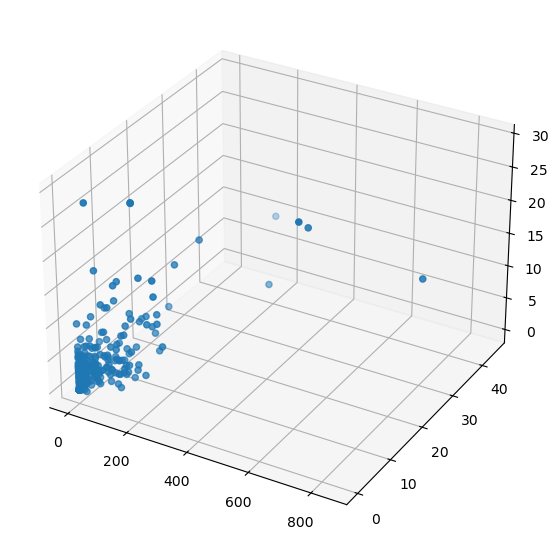

In [7]:
#initial regression plot

fig = plt.figure(figsize = (15, 7))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(catch_per_day, battle_per_day, distance_per_day)

In [9]:
#Lets now compare the predictions to the realities by computing some quick metrics about how well the models predict stuff
#Mean Square Error and Root Mean Squared Error

#first I need to read in the real values
pogo_player_stats_day5 = pd.read_csv("/Users/katiebarnhart/Documents/Pogo_data/Pogo_data_finalday.csv")
real_catch = np.array(pogo_player_stats_day5["Pokemon Caught"])
real_battle = np.array(pogo_player_stats_day5["Battles Won"])
real_distance = np.array(pogo_player_stats_day5["Distance Walked"])

#then I need to compute things
mse_catch = mean_squared_error(real_catch, catch_predictions)
mse_battle = mean_squared_error(real_battle, battle_predictions)
mse_distance = mean_squared_error(real_distance, distance_predictions)
rmse_catch = root_mean_squared_error(real_catch, catch_predictions)
rmse_battle = root_mean_squared_error(real_battle, battle_predictions)
rmse_distance = root_mean_squared_error(real_distance, distance_predictions)

print("The MSEs are: ", mse_catch, mse_battle, mse_distance)
print("And the RMSEs are: ", rmse_catch, rmse_battle, rmse_distance) #really I want these onese 

#for most trainers this isnt aMAzing but isnt terrible either. There were a few cases where the model failed to 
#predict the numbers. However, even in the strongest cases, the errors are still less than about 5%

The MSEs are:  289146.370773484 1246.2939740622107 6248.477213566389
And the RMSEs are:  537.7233217682528 35.30288903280029 79.04730997046255


In [10]:
#Sanity check cell. Can ignore. 
for i in range(312):
    print(i, real_catch[i] - catch_predictions[i])

0 0.0
1 295.91666666665697
2 0.0
3 0.0
4 -156.08333333332848
5 -1.5
6 -1270.0
7 20.666666666671517
8 -36.88888888888869
9 -131.44444444444525
10 -24.361111111109494
11 0.0
12 -119.86111111112405
13 0.0
14 -1673.111111111124
15 353.5
16 -895.0
17 -119.0
18 49.47222222221899
19 14.722222222218988
20 -156.2222222222481
21 161.3888888888905
22 -613.4166666666279
23 -21.027777777777374
24 1753.611111111124
25 262.4722222222481
26 0.0
27 -2.3333333333357587
28 -3516.777777777781
29 -1018.3333333333721
30 6.111111111109494
31 641.9166666666279
32 -250.61111111112405
33 0.0
34 -2.444444444437977
35 0.0
36 -48.47222222224809
37 0.0
38 0.0
39 0.0
40 1118.027777777752
41 0.0
42 223.36111111111677
43 84.25
44 -150.80555555556202
45 279.4722222222481
46 71.47222222221899
47 41.16666666668607
48 0.0
49 -79.83333333331393
50 -709.1666666666861
51 100.72222222221899
52 659.5277777778101
53 13.083333333335759
54 149.19444444443798
55 659.7777777778683
56 -52.33333333333212
57 -270.41666666665697
58 -0.

In [11]:
#sanity check cell 
m_count = 0
for i in range(312):
    if np.absolute(real_catch[i]-catch_predictions[i]) > 1000:
        m_count +=1

print(m_count)

17


<class 'list'>


/var/folders/_0/n4fgknn14j7c9wgk4lfg4kb40000gn/T/ipykernel_2824/3196337104.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  catch_per_day2.append(int(catch_per_day[i]))
/var/folders/_0/n4fgknn14j7c9wgk4lfg4kb40000gn/T/ipykernel_2824/3196337104.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  battle_per_day2.append(int(battle_per_day[i]))
/var/folders/_0/n4fgknn14j7c9wgk4lfg4kb40000gn/T/ipykernel_2824/3196337104.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.

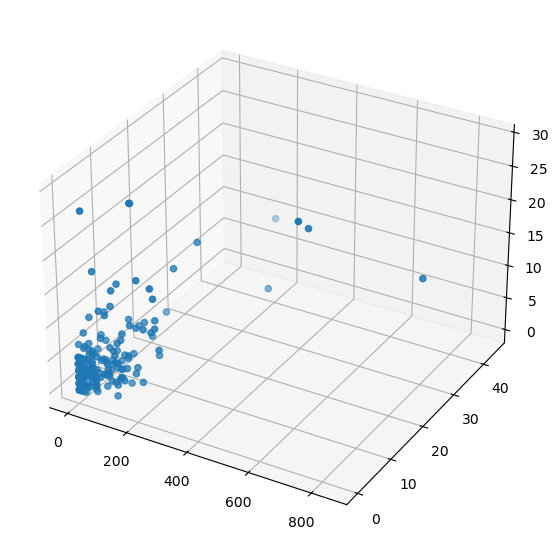

In [12]:
#Active players in some communities, including my old one in Evanston, IL, colloquially sort themselves into four categories:
# 1) Casual: meaning they play a little bit, may not play every day, certainly don't play every in-game event, and may choose to entirely
    #ignore certain aspects of the game.
# 2) Hardcore casual: more intense play than casual but not too intense 
# 3) Casual hardcore: more intense still, plays everyday, plays most if not all events, regularly plays all essentiall aspects of the game
    #but doesn't spend a lot or any money on the game. 
# 4) Hardcore: raids a lot, hours of play per game, spends money, etc. 

#remove players who are inactive
catch_per_day2 = [] 
battle_per_day2 = []
distance_per_day2 = []

for i in range(312):
    catch_per_day2.append(int(catch_per_day[i]))
    battle_per_day2.append(int(battle_per_day[i]))
    distance_per_day2.append(int(distance_per_day[i]))

print(type(catch_per_day2))
# print(catch_per_day2) hooray, this is now a non-ridiculous looking list

catch_per_day2_new, battle_per_day2_new, distance_per_day2_new = zip(
    *[(x, y, z) for x, y, z in zip(catch_per_day2, battle_per_day2, distance_per_day2) if x != 0])

catch_per_day2_new = list(catch_per_day2_new)
battle_per_day2_new = list(battle_per_day2_new)
distance_per_day2_new = list(distance_per_day2_new) 
#thanks ChatGPT. that was a much easier way to do that. I tested this with a smaller list in a debug cell,
#where I could print, and therefore see exactly what this was doing. 

# print(len(catch_per_day2_new), len(battle_per_day2_new), len(distance_per_day2_new))

#lets have a plot of the cleaned data

fig = plt.figure(figsize = (15, 7))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(catch_per_day2_new, battle_per_day2_new, distance_per_day2_new)

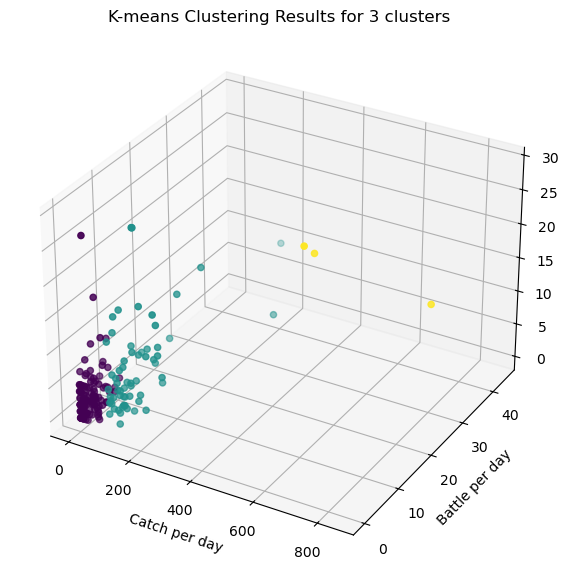

In [13]:
#K means clustering

#some setup
t1 = np.array(catch_per_day2_new)
t2 = np.array(battle_per_day2_new)
t3 = np.array(distance_per_day2_new)
X = np.column_stack((t1, t2, t3))
scaler = StandardScaler()

#X_train, X_test = train_test_split(X, test_size=0.25) not right now, actually. Not necessary for my analysis 
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.fit_transform(X_test)

clusters = 3 #this was rerun after optimization 
kmeans = KMeans(n_clusters=clusters, random_state=5, n_init='auto')
kmeans.fit(X)
labels = kmeans.labels_

fig = plt.figure(figsize = (15, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(t1, t2, t3, c=labels, cmap='viridis')
ax.set_xlabel('Catch per day')
ax.set_ylabel('Battle per day')
ax.set_zlabel('t3')
plt.title('K-means Clustering Results for 3 clusters')
plt.show()

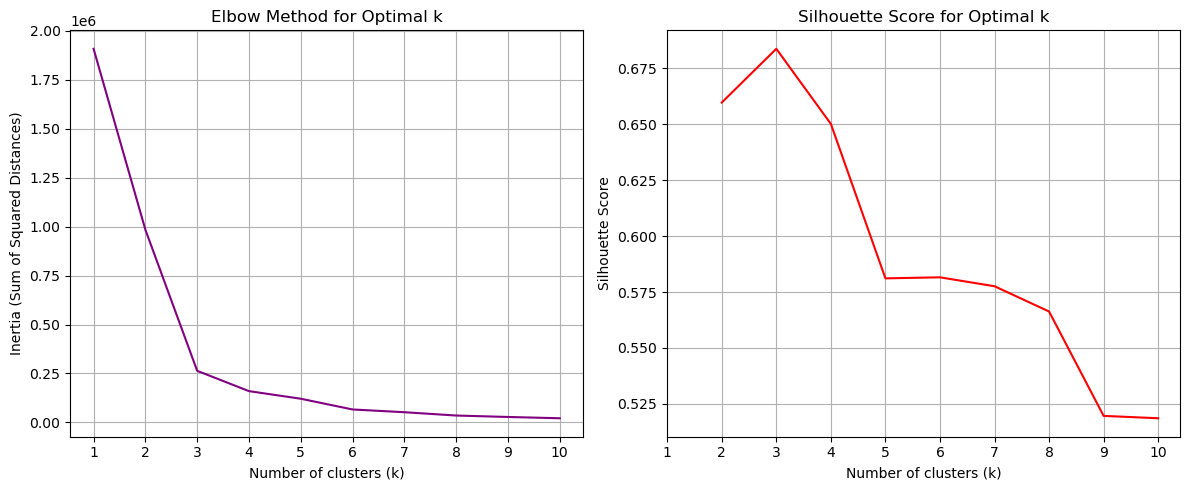

In [15]:
#lets find the optimal number of clusters via two methods

#Elbow method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

#Silhouette Score method
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_range2 = range(2, 11)

for k in k_range2:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels, metric='euclidean')
    silhouette_scores.append(score)

plt.figure(figsize=(12, 5))

# Plot the elbow
plt.subplot(121)
plt.plot(k_range, inertia, color="purple")
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True)

#plot the silhouette 
plt.subplot(122)
plt.plot(k_range2, silhouette_scores, color="red")
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.xticks(k_range)
plt.grid(True)

plt.tight_layout()
plt.show()
#a good chunk of this was generated by ChatGPT and then checked and modified. 

(203,)


/var/folders/_0/n4fgknn14j7c9wgk4lfg4kb40000gn/T/ipykernel_2824/2597003854.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  if i[0]/i[1] >= 15: #inelegant. I should do this the other way to avoid divide by zero warnings.
/var/folders/_0/n4fgknn14j7c9wgk4lfg4kb40000gn/T/ipykernel_2824/2597003854.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  if i[0]/i[1] < 15:


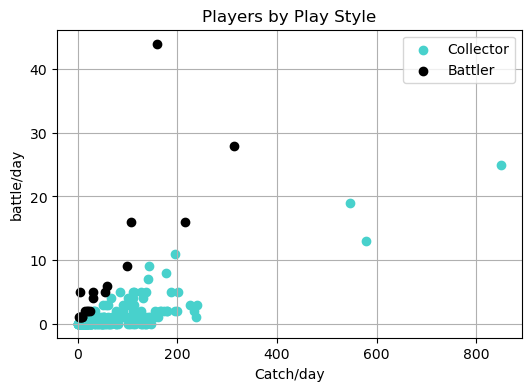

In [16]:
#binary classification algorithms cell

#1 for a collector, 0 for a battler
classifications = []
temp_class_array = np.stack((t1, t2), axis=1)
for i in temp_class_array:
    if i[0]/i[1] >= 15: #inelegant. I should do this the other way to avoid divide by zero warnings. 
        classifications.append(1)
    if i[0]/i[1] < 15:
        classifications.append(0)
        
print(np.shape(classifications))

X_binary_class_array = np.vstack((t1, t2, classifications))

#I do actually want to see this before I start messing with the HW 8 algorithms
features = X_binary_class_array[:2, :]   # shape: (2, N)
labels = X_binary_class_array[2, :]      # shape: (N,)

# Separate points based on labels
x_1 = features[0, labels == 1]
y_1 = features[1, labels == 1]
x_0 = features[0, labels == 0]
y_0 = features[1, labels == 0]

# Plot
plt.figure(figsize=(6, 4))
plt.scatter(x_1, y_1, color='mediumturquoise', label='Collector')
plt.scatter(x_0, y_0, color='black', label='Battler')
plt.xlabel('Catch/day')
plt.ylabel('battle/day')
plt.title('Players by Play Style')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
#binary classification algorithms cell the second
#help debugging goes to chatgpt

features_for_real = X_binary_class_array[:2, :].T
X_train, X_test, y_train, y_test = train_test_split(features_for_real, labels, test_size=0.2, random_state=6, stratify=labels)

#Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
y_proba = gnb.predict_proba(X_test)
gnb_confusion = confusion_matrix(y_test, y_pred)
fpr, tpr, thresh = roc_curve(y_test, y_pred) #roc_curve takes y_true and y_score
roc_auc = auc(fpr, tpr)
print(gnb_confusion)

# Quadratic Discriminant Analysis
qda = QDA()
qda.fit(X_train, y_train)
y_pred2 = qda.predict(X_test)
y_proba2 = qda.predict_proba(X_test)
qda_confusion = confusion_matrix(y_test, y_pred2)
print(qda_confusion)
"""
plt.plot(fpr, tpr)
plt.title("Gaussian Naive Bayes Plot")
plt.xlabel("FPR: False Positive Rate")
plt.ylabel("TPR: True Positive Rate")
plt.show() #HMMM. something is off. """

[[ 1  3]
 [ 1 36]]
[[ 3  1]
 [ 0 37]]


'\nplt.plot(fpr, tpr)\nplt.title("Gaussian Naive Bayes Plot")\nplt.xlabel("FPR: False Positive Rate")\nplt.ylabel("TPR: True Positive Rate")\nplt.show() #HMMM. something is off. '

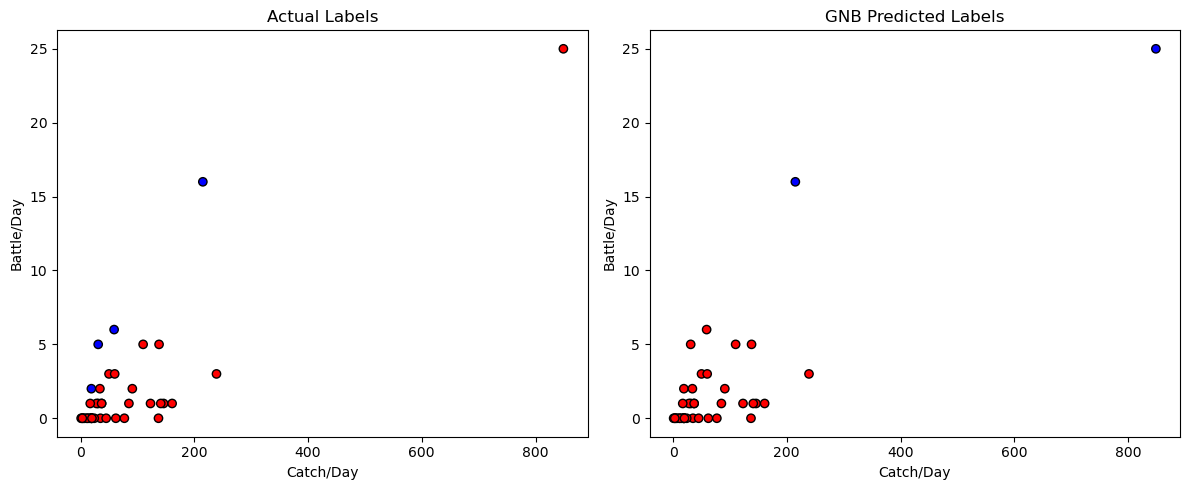

In [18]:
#GNB
plt.figure(figsize=(12, 5))

# 1. Plot ACTUAL labels
plt.subplot(1,2,1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='bwr', edgecolor='k')
plt.title('Actual Labels')
plt.xlabel('Catch/Day')
plt.ylabel('Battle/Day')

# 2. Plot PREDICTED labels
plt.subplot(1,2,2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='bwr', edgecolor='k')
plt.title('GNB Predicted Labels')
plt.xlabel('Catch/Day')
plt.ylabel('Battle/Day')

plt.tight_layout()
plt.show()

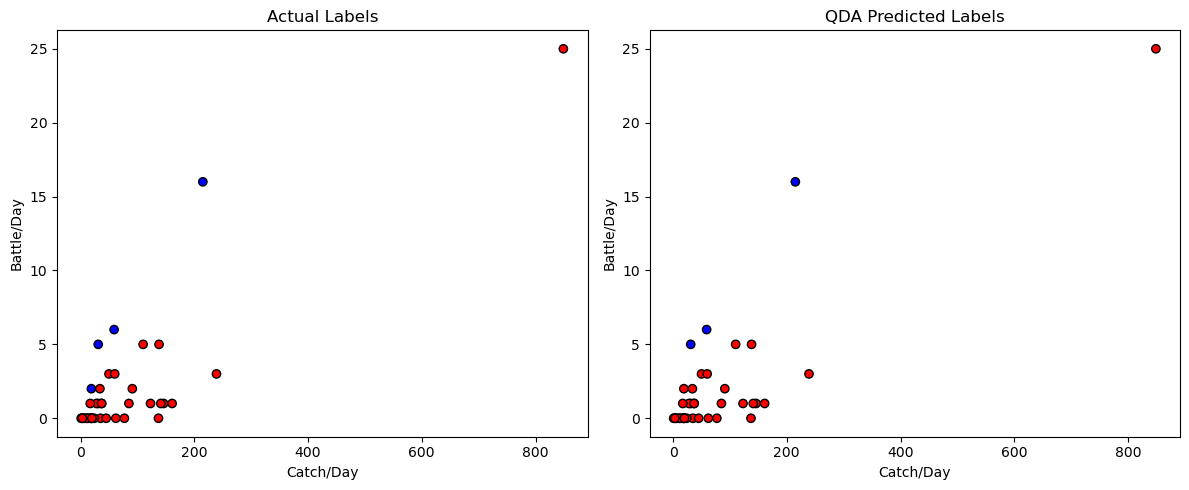

In [19]:
#QDA
plt.figure(figsize=(12, 5))

# 1. Plot ACTUAL labels
plt.subplot(1,2,1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='bwr', edgecolor='k')
plt.title('Actual Labels')
plt.xlabel('Catch/Day')
plt.ylabel('Battle/Day')

# 2. Plot PREDICTED labels
plt.subplot(1,2,2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred2, cmap='bwr', edgecolor='k')
plt.title('QDA Predicted Labels')
plt.xlabel('Catch/Day')
plt.ylabel('Battle/Day')

plt.tight_layout()
plt.show()

In [112]:
#another test cell for debugging!
#And ANYTHING BELOW here is ALSO FOR debugging but I left it in as a reminder. 

a = [0, 101, 12, 7, 0, 60]
b = [9, 4, 0, 0, 15, 3]
c = [20.0, 7.0, 0.2, 0.9, 5.3, 8.1]

# Filter out entries where the corresponding element in a is 0
a_new, b_new, c_new = zip(*[(x, y, z) for x, y, z in zip(a, b, c) if x != 0])

# Convert from tuples to lists
a_new = list(a_new)
b_new = list(b_new)
c_new = list(c_new)

print("a_new =", a_new)
print("b_new =", b_new)
print("c_new =", c_new)

a_new = [101, 12, 7, 60]
b_new = [4, 0, 0, 3]
c_new = [7.0, 0.2, 0.9, 8.1]


In [119]:
aa = np.array(a)
bb = np.array(b)

print(catch_per_day2_new)
Tr = np.array(catch_per_day2_new).T
print(Tr)

[20, 27, 67, 1, 1, 8, 2, 67, 105, 26, 85, 7, 16, 6, 138, 50, 128, 22, 579, 237, 180, 234, 4, 160, 127, 7, 849, 57, 19, 6, 239, 49, 17, 179, 35, 2, 106, 54, 167, 13, 52, 11, 3, 12, 45, 4, 60, 76, 1, 59, 3, 11, 314, 51, 69, 28, 19, 111, 25, 40, 1, 7, 61, 34, 98, 2, 131, 100, 111, 1, 31, 11, 2, 155, 137, 141, 114, 50, 37, 202, 200, 77, 14, 2, 1, 9, 30, 19, 46, 123, 40, 91, 60, 29, 35, 5, 148, 50, 10, 108, 215, 65, 2, 81, 5, 3, 10, 84, 226, 134, 546, 26, 52, 31, 2, 18, 31, 102, 32, 23, 116, 88, 2, 12, 111, 5, 3, 3, 13, 37, 14, 55, 110, 4, 10, 57, 161, 20, 15, 15, 138, 46, 17, 95, 19, 77, 19, 12, 196, 173, 101, 49, 3, 3, 9, 136, 2, 188, 13, 14, 33, 19, 142, 7, 11, 2, 146, 36, 78, 20, 40, 7, 18, 26, 100, 84, 26, 110, 91, 156, 14, 27, 112, 4, 165, 195, 114, 37, 2, 8, 62, 143, 36, 78, 128, 178, 24, 38, 132, 29, 19, 91, 130]
[ 20  27  67   1   1   8   2  67 105  26  85   7  16   6 138  50 128  22
 579 237 180 234   4 160 127   7 849  57  19   6 239  49  17 179  35   2
 106  54 167  13  52  11  